<a href="https://colab.research.google.com/github/Piramu-Mahalingam/DS-Course-Assignment-1/blob/main/Piramu_M_Assignment_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#a)In the state column, replace the -1 with the mode of state column.
# Calculate the mode of the 'state' column (most frequent value)
import pandas as pd
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("/content/Indian_food.csv")
df.head()
mode_state = df['state'].mode()[0]
# Replace '-1' values with the mode
df['state'] = df['state'].replace('-1', mode_state)
df['state'].value_counts()

,count
state,
Gujarat,57
Punjab,32
Maharashtra,30
West Bengal,24
Assam,21
Tamil Nadu,20
Andhra Pradesh,10
Uttar Pradesh,9
Kerala,8


In [3]:
#b)Whatever the state you got in previous question, fill the corresponding region in the region column.
# Find the corresponding region for Gujarat
region_for_gujarat = df[df['state'] == 'Gujarat']['region'].mode()[0]
# Replace '-1' values in the 'region' column with the region of Gujarat
df['region'] = df['region'].replace('-1', region_for_gujarat)
df['region'].value_counts()

,count
region,
West,96
North,49
South,49
East,31
North East,25
Central,3


In [4]:
#c)Replace the -1 with mean for cook time variable.
# Convert cook_time to numeric (in case it's stored as a string)
df['cook_time'] = pd.to_numeric(df['cook_time'], errors='coerce')
# Calculate the mean of 'cook_time', excluding -1 values
mean_cook_time = df[df['cook_time'] != -1]['cook_time'].mean()
# Replace -1 values with the calculated mean
df['cook_time'] = df['cook_time'].replace(-1, mean_cook_time)
df['cook_time'].describe()

,cook_time
count,253.000000
mean,39.028689
std,46.931426
min,2.000000
25%,25.000000
50%,30.000000
75%,45.000000
max,720.000000


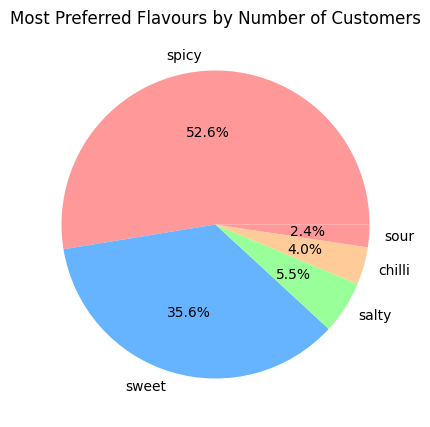

In [5]:
#d)Most preferred flavours by number of customers using pie chart.
import matplotlib.pyplot as plt
# Count the occurrences of each flavor profile
flavor_counts = df['flavor_profile'].value_counts()
# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(flavor_counts, labels=flavor_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("Most Preferred Flavours by Number of Customers")
plt.show()


<ipython-input-7-e8e7f2d9777d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=course_counts.index, y=course_counts.values, palette='viridis', order=course_counts.index)


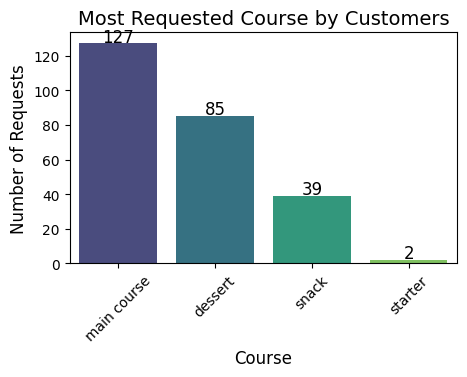

In [7]:
#e)Most requested course by customers using Bar chart. Print the labels also on the top of each bar. Then sort the bar chart in descending order.
import seaborn as sns

# Count the occurrences of each course
course_counts = df['course'].value_counts()
# Plot the bar chart
plt.figure(figsize=(5, 3))
ax = sns.barplot(x=course_counts.index, y=course_counts.values, palette='viridis', order=course_counts.index)
# Add labels on top of each bar
for i, value in enumerate(course_counts.values):
    ax.text(i, value + 1, str(value), ha='center', fontsize=12)
# Set titles and labels
plt.title("Most Requested Course by Customers", fontsize=14)
plt.xlabel("Course", fontsize=12)
plt.ylabel("Number of Requests", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
# Show the plot
plt.show()

<Figure size 500x300 with 0 Axes>

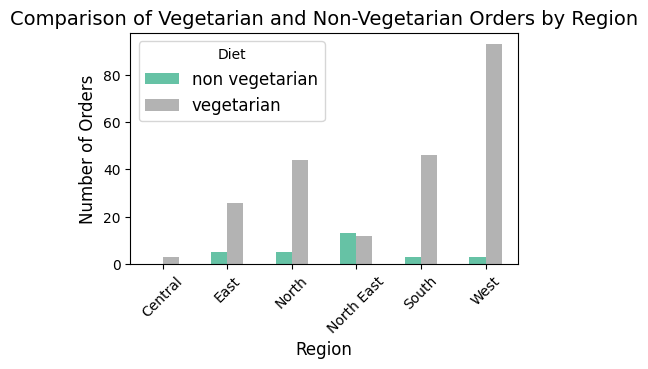

In [8]:
#f)Comparison between Vegetarians and Non-Veg orders in each region. Hint: You can use stacked/grouped bar chart for comparison.
# Count the number of vegetarian and non-vegetarian dishes in each region
veg_nonveg_counts = df.groupby(['region', 'Diet']).size().unstack()
# Plot the grouped bar chart
plt.figure(figsize=(5, 3))
veg_nonveg_counts.plot(kind='bar', stacked=False, figsize=(5, 3), colormap='Set2')
# Set titles and labels
plt.title("Comparison of Vegetarian and Non-Vegetarian Orders by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title="Diet", fontsize=12)
# Show the plot
plt.show()


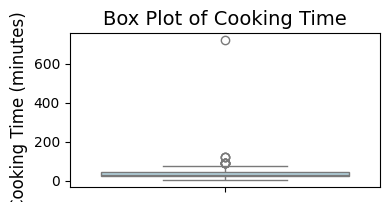

In [9]:
#g)Create the box plot for Order cooking time to see the distribution. Also check if there are any outliers in this column.
# Create a box plot for cook_time to check distribution and outliers
plt.figure(figsize=(4, 2))
sns.boxplot(y=df['cook_time'], color='lightblue')
# Set title and labels
plt.title("Box Plot of Cooking Time", fontsize=14)
plt.ylabel("Cooking Time (minutes)", fontsize=12)
# Show the plot
plt.show()

In [12]:
#a)Create a dataframe which will have the billionaires whose age is greater than or equal to 30. Then create a scatter plot to show the relationship between age and net worth.
import pandas as pd1
import matplotlib.pyplot as plt
df1=pd1.read_csv("/content/Billionaires_Stats.csv",encoding='latin-1')
df1.head()

,finalWorth,category,personName,age,country,city,gender,birthYear,birthMonth,birthDay
0,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,M,1949.0,3.0,5.0
1,180000,Automotive,Elon Musk,51.0,United States,Austin,M,1971.0,6.0,28.0
2,114000,Technology,Jeff Bezos,59.0,United States,Medina,M,1964.0,1.0,12.0
3,107000,Technology,Larry Ellison,78.0,United States,Lanai,M,1944.0,8.0,17.0
4,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,M,1930.0,8.0,30.0


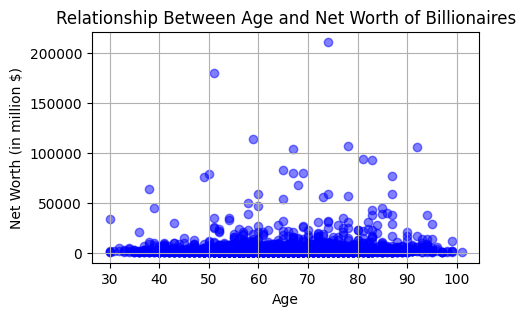

In [13]:
import matplotlib.pyplot as plt
# Filter billionaires aged 30 or older
df_filtered = df1[df1["age"] >= 30]
# Create scatter plot
plt.figure(figsize=(5, 3))
plt.scatter(df_filtered["age"], df_filtered["finalWorth"], alpha=0.5, color="blue")
# Labels and title
plt.xlabel("Age")
plt.ylabel("Net Worth (in million $)")
plt.title("Relationship Between Age and Net Worth of Billionaires")
plt.grid(True)
# Show plot
plt.show()

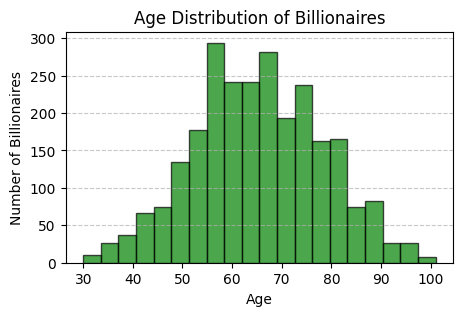

In [14]:
#b)Create a histogram to see the distribution of ages.
plt.figure(figsize=(5, 3))
plt.hist(df_filtered["age"], bins=20, color="green", edgecolor="black", alpha=0.7)
# Labels and title
plt.xlabel("Age")
plt.ylabel("Number of Billionaires")
plt.title("Age Distribution of Billionaires")
plt.grid(axis="y", linestyle="--", alpha=0.7)
# Show plot
plt.show()

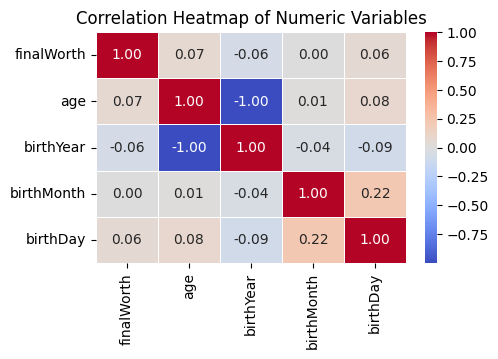

In [19]:
#c)Create a heatmap and see the correlation between all the numeric variables. Print the correlation value also in the heatmap.
#c)Create a heatmap and see the correlation between all the numeric variables. Print the correlation value also in the heatmap.
import seaborn as sns
import numpy as np
# Compute the correlation matrix, select only numeric columns
numeric_df = df_filtered.select_dtypes(include=np.number) # Select only numeric columns
corr_matrix = numeric_df.corr()
# Create a heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# Title
plt.title("Correlation Heatmap of Numeric Variables")
# Show plot
plt.show()

'/content/correlation_heatmap.png'

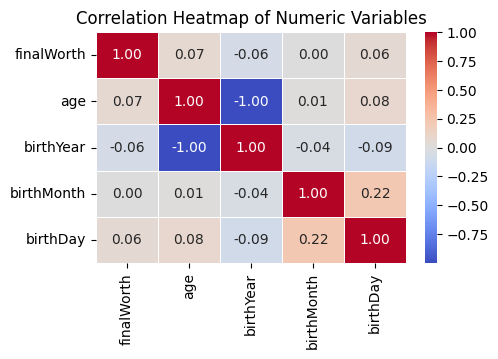

In [22]:
#d)Save the figure in your pwd generated through previous question.
# Save the heatmap figure
fig, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=ax)
ax.set_title("Correlation Heatmap of Numeric Variables")
# Save the figure in the current working directory
heatmap_path = "/content/correlation_heatmap.png"
fig.savefig(heatmap_path)
# Return the saved file path
heatmap_path

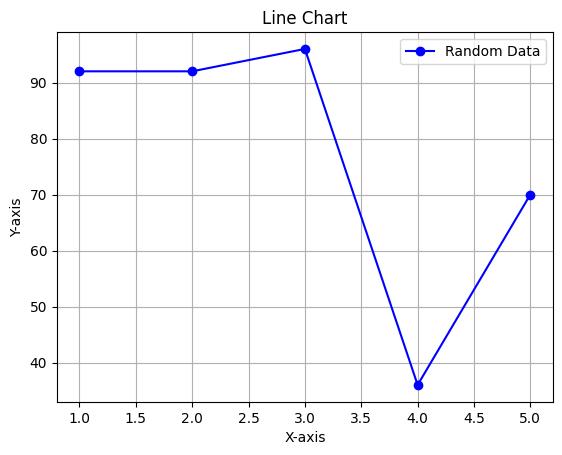

In [24]:
#3.Name any 5 types of charts you are familiar with (using any of 3 libraries).
#Write the sample code also to create those charts using random data.
#Line Chart
import matplotlib.pyplot as plt
import numpy as np
# Generate random data with matching dimensions
x = np.arange(1, 6)  # x-axis with 5 elements
y = np.random.randint(10, 100, size=5)  # y-axis with 5 elements
# Create line plot
plt.plot(x, y, marker="o", linestyle="-", color="b", label="Random Data")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Line Chart")
plt.legend()
plt.grid()
plt.show()

<ipython-input-25-0db19c25c346>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Category", y="Values", data=data, palette="viridis")


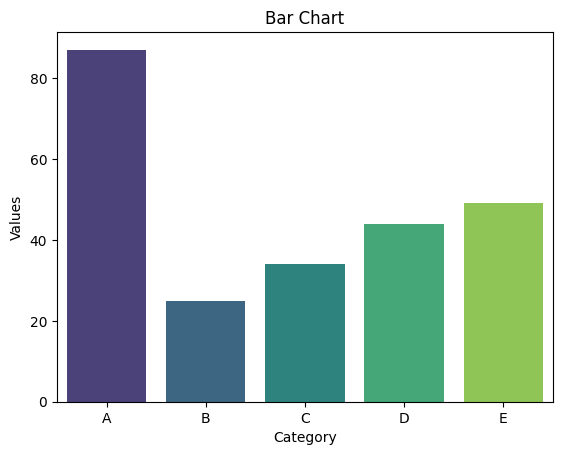

In [25]:
#Bar chart
import seaborn as sns
import pandas as pd
# Generate random data
data = pd.DataFrame({"Category": ["A", "B", "C", "D", "E"], "Values": np.random.randint(10, 100, size=5)})
# Create bar chart
sns.barplot(x="Category", y="Values", data=data, palette="viridis")
plt.title("Bar Chart")
plt.show()

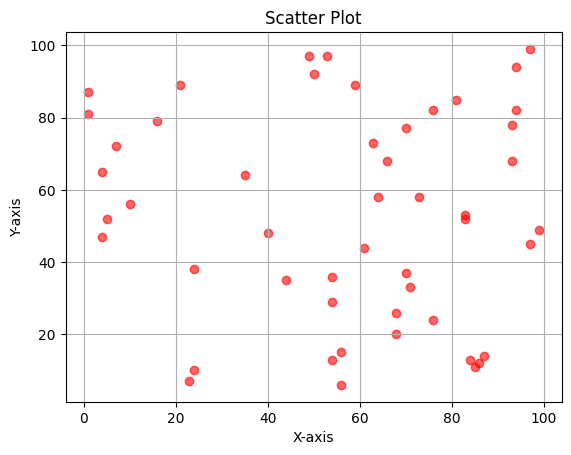

In [26]:
#scatter plot
x = np.random.randint(1, 100, 50)
y = np.random.randint(1, 100, 50)
# Create scatter plot
plt.scatter(x, y, color="red", alpha=0.6)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot")
plt.grid()
plt.show()

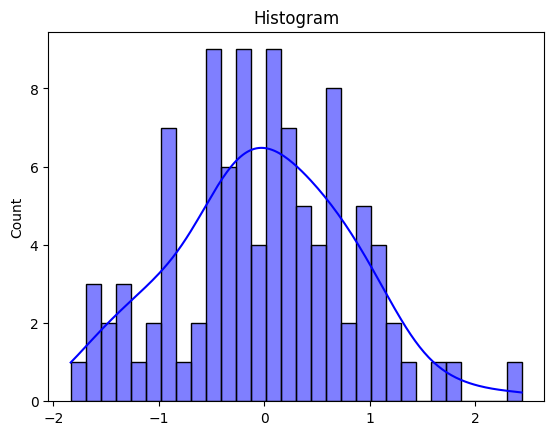

In [35]:
#histogram
# Generate random data
data = np.random.randn(100)
# Create histogram
sns.histplot(data, bins=30, kde=True, color="blue")
plt.title("Histogram")
plt.show()

In [34]:
#pie chart
import plotly.express as px
# Generate random data
data = {"Category": ["A", "B", "C", "D"], "Values": np.random.randint(10, 100, size=4)}
df = pd.DataFrame(data)
# Create pie chart
fig = px.pie(df, names="Category",values="Values", title="Pie Chart")
fig.show()